# Credit Card Fraud Detection
![image.png](https://github.com/Nneji123/Credit-Card-Fraud-Detection/raw/main/image.png)

## Problem Statement
Credit card fraud is a form of identity theft that involves an unauthorized taking of another's credit card information for the purpose of charging purchases to the account or removing funds from it.

In this project we built a machine learning model that can accurately detect fraudulent credit card transactions based on the following features:

The dataset used for this project is available on Kaggle through this [link.](https://www.kaggle.com/datasets/ealaxi/paysim1)

**Carried out by Group 3 Zummit Africa AI/ML Team**
**Contributors:** 
- **Hilary Ifezue(Group Lead)**
- **Nneji Ifeanyi**
- **Somtochukwu Ogechi**
- **ThankGod Omieje**


## Installing the requirements and loading the data using Kaggle API

In [2]:
%%writefile requirements.txt
colabcode
fastapi
uvicorn
python-multipart
pyngrok
kaggle


Overwriting requirements.txt


In [3]:
!pip install -r requirements.txt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Upload your kaggle.json file using this cell so that you can use the kaggle API
!pip install -q kaggle
from google.colab import files

files.upload()


In [7]:
# This cell creates a .kaggle hidden folder in our root directory and copies the kaggle.json file to the folder.
! mkdir ~/.kaggle

! cp kaggle.json ~/.kaggle/
! chmod 600 /root/.kaggle/kaggle.json

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [8]:
# This cell will download the dataset used for this project to the /content directory and also unzip the csv file.
!kaggle datasets download -d ealaxi/paysim1
!unzip /content/paysim1.zip

 94% 167M/178M [00:01<00:00, 122MB/s]
100% 178M/178M [00:01<00:00, 94.0MB/s]
Archive:  /content/paysim1.zip
  inflating: PS_20174392719_1491204439457_log.csv  


## Data Exploration and Analysis

In [4]:
# Importing some important libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')
%matplotlib inline

In [5]:
df = pd.read_csv('PS_20174392719_1491204439457_log.csv')
pd.set_option('display.max.columns', None)
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [11]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [15]:
df.shape

(6362620, 11)

We can see that from the above cells the dataset has 11 columns and more than 6 million rows.

This is the basic information about the dataset gotten from kaggle:

This is a sample of 1 row with headers explanation:

1,PAYMENT,1060.31,C429214117,1089.0,28.69,M1591654462,0.0,0.0,0,0

step - maps a unit of time in the real world. In this case 1 step is 1 hour of time. Total steps 744 (30 days simulation).

type - CASH-IN, CASH-OUT, DEBIT, PAYMENT and TRANSFER.

amount -
amount of the transaction in local currency.

nameOrig - customer who started the transaction

oldbalanceOrg - initial balance before the transaction

newbalanceOrig - new balance after the transaction

nameDest - customer who is the recipient of the transaction

oldbalanceDest - initial balance recipient before the transaction. Note that there is not information for customers that start with M (Merchants).

newbalanceDest - new balance recipient after the transaction. Note that there is not information for customers that start with M (Merchants).

isFraud - This is the transactions made by the fraudulent agents inside the simulation. In this specific dataset the fraudulent behavior of the agents aims to profit by taking control or customers accounts and try to empty the funds by transferring to another account and then cashing out of the system.

isFlaggedFraud - The business model aims to control massive transfers from one account to another and flags illegal attempts. An illegal attempt in this dataset is an attempt to transfer more than 200.000 in a single transaction.

In [16]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
step,6362620.0,2.433972e+02,1.423320e+02,1.0,156.00,239.000,3.350000e+02,7.430000e+02
amount,6362620.0,1.798619e+05,6.038582e+05,0.0,13389.57,74871.940,2.087215e+05,9.244552e+07
oldbalanceOrg,6362620.0,8.338831e+05,2.888243e+06,0.0,0.00,14208.000,1.073152e+05,5.958504e+07
newbalanceOrig,6362620.0,8.551137e+05,2.924049e+06,0.0,0.00,0.000,1.442584e+05,4.958504e+07
oldbalanceDest,6362620.0,1.100702e+06,3.399180e+06,0.0,0.00,132705.665,9.430367e+05,3.560159e+08
newbalanceDest,6362620.0,1.224996e+06,3.674129e+06,0.0,0.00,214661.440,1.111909e+06,3.561793e+08
isFraud,6362620.0,1.290820e-03,3.590480e-02,0.0,0.00,0.000,0.000000e+00,1.000000e+00
isFlaggedFraud,6362620.0,2.514687e-06,1.585775e-03,0.0,0.00,0.000,0.000000e+00,1.000000e+00


In [17]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

There are no null values in any of the columns of the dataset.

In [20]:
len_not_fraud = len(df['isFraud'][df.isFraud == 0])
len_is_fraud = len(df['isFraud'][df.isFraud == 1])

arr = np.array([len_not_fraud, len_is_fraud])
labels = ['Not Fraudulent', 'Fraudulent']
print(f"Total No. of Non-Fraudulent Cases: {len_not_fraud}")
print(f"Total No. Fraudulent Cases: {len_is_fraud}")

0    6354407
1       8213
Name: isFraud, dtype: int64

We can see that the number of fraudulent cases in the dataset is really small with only 8213 transactions out of over 6 million transactions is tagged as fraud. Therefore the dataset is highly imbalanced and some workarounds we have to be applied to fix this problem.

In [22]:
df['amount'].describe()

count    6.362620e+06
mean     1.798619e+05
std      6.038582e+05
min      0.000000e+00
25%      1.338957e+04
50%      7.487194e+04
75%      2.087215e+05
max      9.244552e+07
Name: amount, dtype: float64

In [23]:
df.isFraud.nunique()

2

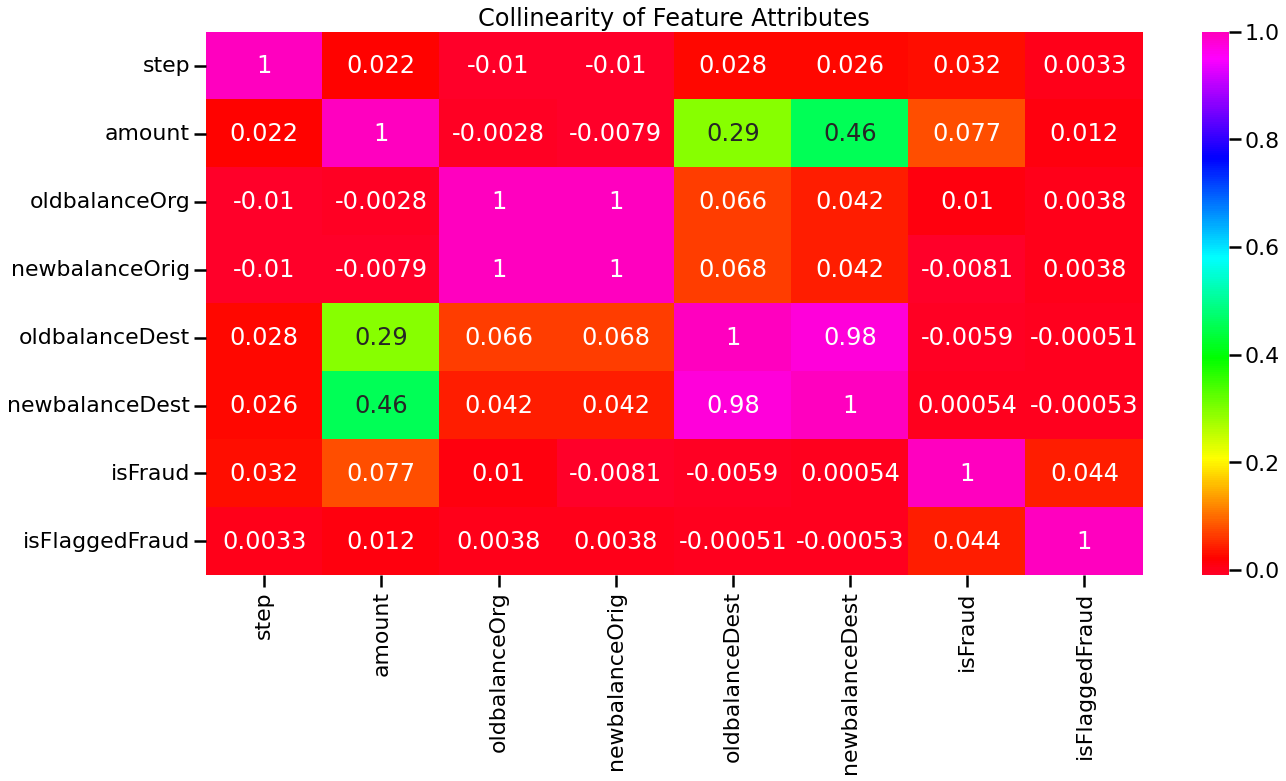

In [31]:
fig, ax = plt.subplots(figsize=(21,10))
sns.set_context('poster')
corr = df.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns,cmap='gist_rainbow', annot = True)
ax.set_title('Collinearity of Feature Attributes')
plt.savefig('cormap.png')

#plt.pie(arr, labels = labels, explode=[0.3, 0.0], shadow = True)
#plt.show()

In [33]:
#@title The next 3 cells contain functions for graph and chart plotting
# Distribution graphs (histogram/bar graph) of column data
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()

In [34]:
#@title 
# Correlation matrix
def plotCorrelationMatrix(df, graphWidth):
    filename = df.dataframeName
    df = df.dropna('columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for {filename}', fontsize=15)
    plt.show()

In [35]:
#@title 
# Scatter and density plots
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()

In [ ]:
#plotScatterMatrix(df, 20, 10)

In [6]:
# print percentage of questions where target == 1
percent = (len(df.loc[df.isFraud==1])) / (len(df.loc[df.isFraud == 0])) * 100
print(f"Percentage of Fraudulent Transanctions in the Dataset: {percent}%")

Percentage of Fraudulent Transanctions in the Dataset: 0.129248881917699%


In [40]:
df["type"].nunique()

5

In [43]:
df["type"].unique()


array(['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'],
      dtype=object)

We have 5 unique columns in the "type" columns namely:
- PAYMENT
- TRANSFER 
- CASH_OUT 
- DEBIT 
- CASH_IN

These represent the type of transaction carried out in the dataset. We will be creating a new dataframe with these values converted to numerical datatypes.

In [42]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


## Model Building and Evaluation

### Feature Engineering
The "type" column in the dataset contains categorical data namely:
- PAYMENT
- TRANSFER
- CASH_OUT
- DEBIT
- CASH_IN

We will be using label encoding to convert the categorical data to numerical datatype.

In [7]:
df.drop(['nameOrig', 'nameDest'], axis=1, inplace=True)

In [8]:
data = df.copy(deep = True)

In [9]:
# get all categorical columns in the dataframe
catCols = [col for col in data.columns if data[col].dtype=="O"]

from sklearn.preprocessing import LabelEncoder

lb_make = LabelEncoder()

for item in catCols:
    data[item] = lb_make.fit_transform(data[item])


In [10]:
data.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,3,9839.64,170136.0,160296.36,0.0,0.0,0,0
1,1,3,1864.28,21249.0,19384.72,0.0,0.0,0,0
2,1,4,181.00,181.0,0.00,0.0,0.0,1,0
3,1,1,181.00,181.0,0.00,21182.0,0.0,1,0
4,1,3,11668.14,41554.0,29885.86,0.0,0.0,0,0


The type column has now been converted from a categorical datatype to numerical datatype using label encoding.

- PAYMENT = 3
- TRANSFER = 4
- CASH_OUT = 1
- DEBIT = 2
- CASH_IN = 0

In [11]:
# The function below will be used to evaluate different metrics of the algorithms used here.
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

def evaluate_model(y_test, y_pred):
    print("Accuracy Score: ", accuracy_score(y_test, y_pred))
    print("Precision Score: ", precision_score(y_test, y_pred))
    print("Recall Score: ", recall_score(y_test, y_pred))
    print("F1 Score: ", f1_score(y_test, y_pred))
    print("Confusion Matrix: ", confusion_matrix(y_test, y_pred))
    

    df = {'y_Actual': y_test, 'y_Predicted': y_pred}

    df1 = pd.DataFrame(df, columns = ['y_Actual','y_Predicted'])

    clf_confusion_matrix = pd.crosstab(df['y_Predicted'], df['y_Actual'], rownames = ['Predicted'], colnames=['Actual'])

    sns.heatmap(clf_confusion_matrix, annot=True)
    

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier

X = data.drop('isFraud', axis=1)
y = data.isFraud


# setting up testing and training sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=27)

Unique predicted labels:  [0]
Accuracy Score:  0.9986904765646856
Precision Score:  0.0
Recall Score:  0.0
F1 Score:  0.0
Confusion Matrix:  [[1588572       0]
 [   2083       0]]


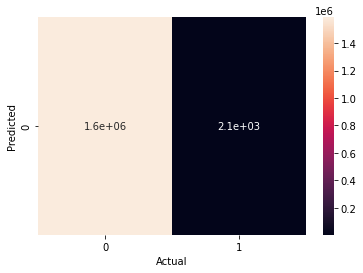

In [13]:
# DummyClassifier to predict only target 0
dummy = DummyClassifier(strategy='most_frequent').fit(X_train, y_train)
dummy_pred = dummy.predict(X_test)

# checking unique labels
print('Unique predicted labels: ', (np.unique(dummy_pred)))

# checking accuracy
evaluate_model(y_test, dummy_pred)

As we can see the Dummy classifier accurately predicts non-fraudulent transactions with an accuracy of 99.8% but that is not our focus. We need to be able to accurately predict fraudulent transactions.

### Logistic Regression
Logistic regression estimates the probability of an event occurring, such as voted or didn't vote, based on a given dataset of independent variables. Since the outcome is a probability, the dependent variable is bounded between 0 and 1.

In [14]:
# Modeling the data as is
# Train model
lr = LogisticRegression()
model1 = lr.fit(X_train, y_train)
 
# Predict on training set
lr_pred = model1.predict(X_test)

Accuracy Score:  0.9983421923672953
Precision Score:  0.3843906510851419
Recall Score:  0.442150744119059
F1 Score:  0.4112525117213664
Confusion Matrix:  [[1587097    1475]
 [   1162     921]]


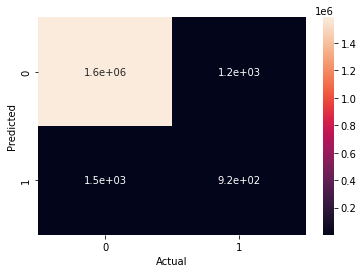

In [15]:
evaluate_model(y_test, lr_pred)

In [16]:
# Checking unique values
predictions = pd.DataFrame(lr_pred)
predictions[0].value_counts()

0    1588259
1       2396
Name: 0, dtype: int64

In [17]:
pd.DataFrame(confusion_matrix(y_test, lr_pred))

,0,1
0,1587097,1475
1,1162,921


The Logistic Regression Model performs quite well but the recall score is still very low. More work needs to be done with the dataset.

### Random Forest Classifier

A random forest is a meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting.

Accuracy Score:  0.9996837780662683
Precision Score:  0.9776299879081015
Recall Score:  0.7762842054728757
F1 Score:  0.8654000535188653
Confusion Matrix:  [[1588535      37]
 [    466    1617]]


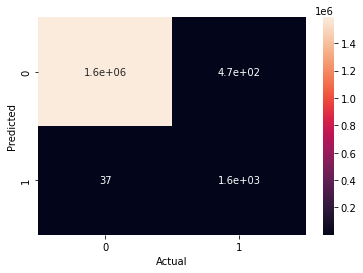

In [18]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=10).fit(X_train, y_train)

# predict on test set
rfc_pred = rfc.predict(X_test)

evaluate_model(y_test, rfc_pred)

In [19]:
# Checking unique values
predictions = pd.DataFrame(rfc_pred)
predictions[0].value_counts()

0    1589001
1       1654
Name: 0, dtype: int64

In [20]:
pd.DataFrame(confusion_matrix(y_test, rfc_pred))

,0,1
0,1588535,37
1,466,1617


We can see that the Random Forest had the best scores so far across different metrics with a recall score of 77% and an F1 score of 86%. The next sections will look at the extreme gradient boosting classifier and gradient boosted tree classifier.

### XGBoost
XGBoost is an optimized distributed gradient boosting library designed to be highly efficient, flexible and portable. It implements Machine Learning algorithms under the Gradient Boosting framework. It provides a parallel tree boosting to solve many data science problems in a fast and accurate way.

Unlike accuracy, LogLoss is robust in the presence of imbalanced classes. It takes into account the certainty of the prediction. That is the evaluation metric that will be used here.

In [21]:
from xgboost import XGBClassifier
xgb1 = XGBClassifier(colsample_bytree = 1.0,
                    learning_rate = 0.1,
                    max_depth =4,
                    n_estimators = 500,
                    subsample = 1.0)

eval_set = [(X_test, y_test)]

xgb1.fit(X_train, y_train, early_stopping_rounds=30, eval_metric='logloss', eval_set=eval_set, verbose=True)

[10:02:12] WARNING: /workspace/src/learner.cc:686: Tree method is automatically selected to be 'approx' for faster speed. To use old behavior (exact greedy algorithm on single machine), set tree_method to 'exact'.
[0]	validation_0-logloss:0.608665
Will train until validation_0-logloss hasn't improved in 30 rounds.
[1]	validation_0-logloss:0.515906
[2]	validation_0-logloss:0.454847
[3]	validation_0-logloss:0.39967
[4]	validation_0-logloss:0.352005
[5]	validation_0-logloss:0.313321
[6]	validation_0-logloss:0.281582
[7]	validation_0-logloss:0.250393
[8]	validation_0-logloss:0.220347
[9]	validation_0-logloss:0.198778
[10]	validation_0-logloss:0.176835
[11]	validation_0-logloss:0.158267
[12]	validation_0-logloss:0.142183
[13]	validation_0-logloss:0.127404
[14]	validation_0-logloss:0.115249
[15]	validation_0-logloss:0.105001
[16]	validation_0-logloss:0.095031
[17]	validation_0-logloss:0.08567
[18]	validation_0-logloss:0.077921
[19]	validation_0-logloss:0.070096
[20]	validation_0-logloss:0.06

KeyboardInterrupt: ignored

In [22]:
pred6 = xgb1.predict(X_test)
evaluate_model(y_test, pred6)


XGBoostError: ignored

In [ ]:
# Checking unique values
predictions = pd.DataFrame(pred6)
predictions[0].value_counts()

In [ ]:
pd.DataFrame(confusion_matrix(y_test, pred6))

### Selecting Our Final Model

The final model used which had the best scores across all metrics will be the random forest classifier.

In [23]:
import joblib
joblib.dump(rfc, "credit_fraud.pkl")

['credit_fraud.pkl']

## Creating the API and Streamlit Frontend Interface

In [24]:
!du -sh credit_fraud.pkl

2.5M	credit_fraud.pkl


In [ ]:
!wget https://bin.equinox.io/c/bNyj1mQVY4c/ngrok-v3-stable-linux-amd64.tgz
!tar -xvzf /content/ngrok-v3-stable-linux-amd64.tgz
!ngrok authtoken 29vr8YhWZ9CDHrUq2kr0CpUA0e8_6ik4hU5GjJZeAYagTH5i4

In [ ]:
!pip install -q streamlit
from pyngrok import ngrok 
public_url = ngrok.connect(port='8501')
public_url

In [36]:
%%writefile streamlit_app.py
import streamlit as st
import pandas as pd
import numpy as np
import joblib
import json
import requests as re

st.title("Credit Card Fraud Detection Web App")

st.image("https://github.com/Nneji123/Credit-Card-Fraud-Detection/raw/main/image.png")

st.write("""
## About
Credit card fraud is a form of identity theft that involves an unauthorized taking of another's credit card information for the purpose of charging purchases to the account or removing funds from it.

**This Streamlit App utilizes a Machine Learning API in order to detect fraudulent credit card  based on the following criteria: hours, type of transaction, amount, balance before and after transaction etc.** 

The notebook, model and documentation(Dockerfiles, FastAPI script, Streamlit App script) are available on [GitHub.](https://github.com/Nneji123/Credit-Card-Fraud-Detection)        

**Made by Group 3 Zummit Africa AI/ML Team**
**Contributors:** 
- **Hilary Ifezue(Group Lead)**
- **Nneji Ifeanyi**
- **Somtochukwu Ogechi**
- **ThankGod Omieje**
""")


st.sidebar.header('User Input Features of The Transaction')

sender_name = st.text_input("Input Sender ID")
receiver_name = st.text_input("")
step = st.sidebar.slider('Number of Hours it took the Transaction to complete: ')
types = st.sidebar.selectbox("Type of Transfer Made: Enter 0 for Cash In Transaction\n 1 for Cash Out Transaction\n 2 for Debit Transaction\n 3 for Payment Transaction\n  4 for Transfer Transaction.",(0,1,2,3,4))
amount = st.sidebar.number_input("Amount in $",min_value=0, max_value=110000)
oldbalanceorg = st.sidebar.number_input('Original Balance Before Transaction was made',min_value=0, max_value=110000)
newbalanceorg= st.sidebar.number_input('New Balance After Transaction was made',min_value=0, max_value=110000)
oldbalancedest= st.sidebar.number_input('Old Balance',min_value=0, max_value=110000)
newbalancedest= st.sidebar.number_input('New Balance',min_value=0, max_value=110000)
isflaggedfraud = st.sidebar.selectbox('Specify if this was flagged as Fraud by your System: ',(0,1))

if st.button("Detection Result"):
    values = {
            'Hours': step,
                'type_of_transfer': types,
                'amount': amount,
                'old_balance_original': oldbalanceorg,
                'new_balance_original': newbalanceorg,
                'old_balance_dest': oldbalancedest,
                'new_balance_dest': newbalancedest,
                'is_flagged_fraud': isflaggedfraud}

    res = re.post(f"https://credit-fraud-ml-api.herokuapp.com/predict",json=values)
    json_str = json.dumps(res.json())
    resp = json.loads(json_str)
    st.write(f"The transaction that took place between{} and {} is {resp[0]}")











Overwriting streamlit_app.py


In [37]:
!streamlit run /content/streamlit_app.py & npx localtunnel --port 8501 

2022-06-18 11:09:55.577 INFO    numexpr.utils: NumExpr defaulting to 2 threads.
npx: installed 22 in 2.787s

  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.2:8501
  External URL: http://35.186.164.246:8501

your url is: https://major-pillows-refuse-35-186-164-246.loca.lt
  Stopping...
^C


## FastAPI Modelling

In [30]:
from colabcode import ColabCode

In [31]:

from fastapi import FastAPI, File, UploadFile, Response
from fastapi.responses import StreamingResponse, FileResponse
import uvicorn
import joblib
import numpy as np
from pydantic import BaseModel
import io
import pandas as pd
from io import BytesIO, StringIO


app = FastAPI(
    title="Credit Card Fraud Detection API",
    description="""An API that utilises a Machine Learning model that detects if a credit card transaction is fraudulent or not based on the following features: age, gender, blood pressure, smoke, coughing, allergies, fatigue etc.""",
    version="0.1.0", debug=True)


model = joblib.load('credit_fraud.pkl')

@app.get('/')
def home():
    return {'Title': 'Credit Card Fraud Detection API'}
																	
class fraudDetection(BaseModel):
    step:int
    types:int
    amount:float	
    oldbalanceorig:float	
    newbalanceorig:float	
    oldbalancedest:float	
    newbalancedest:float	
    isflaggedfraud:float


@app.post('/predict')
def predict(data : fraudDetection):
                                                                                                                                                                                                                                
    features = np.array([[data.step, data.types, data.amount, data.oldbalanceorig, data.newbalanceorig, data.oldbalancedest, data.newbalancedest, data.isflaggedfraud]])
    model = joblib.load('credit_fraud.pkl')

    predictions = model.predict(features)
    if predictions == 1:
        return {"fraudulent"}
    elif predictions == 0:
        return {"not fraudulent"}

@app.post("/upload")
async def upload(file: UploadFile = File(...)):
    model = joblib.load('model.pkl')
    contents = await file.file.read()
    buffer = BytesIO(contents)
    df = pd.read_csv(StringIO(str(buffer.file.read(), 'utf-16')), encoding='utf-16')
    #df1 = df.to_numpy()
    #predictions = model.predict(df1)
    #predictions_list = pd.DataFrame(predictions, columns = ["Predictions"])
    buffer.close()
    #return predictions_list
    
    
    return df.to_dict(orient='records')

In [32]:
cc = ColabCode(port=12000, code=False)
cc.run_app(app=app)

INFO:     Started server process [1554]
INFO:     Waiting for application startup.
INFO:     Application startup complete.
INFO:     Uvicorn running on http://127.0.0.1:12000 (Press CTRL+C to quit)


Public URL: NgrokTunnel: "https://cc65-35-186-164-246.ngrok.io" -> "http://localhost:12000"
INFO:     102.89.38.208:0 - "GET / HTTP/1.1" 200 OK
INFO:     102.89.38.208:0 - "GET /favicon.ico HTTP/1.1" 404 Not Found
INFO:     102.89.38.208:0 - "GET /docs HTTP/1.1" 200 OK
INFO:     102.89.38.208:0 - "GET /openapi.json HTTP/1.1" 200 OK
INFO:     102.89.38.208:0 - "POST /predict HTTP/1.1" 200 OK


INFO:     Shutting down
INFO:     Waiting for application shutdown.
INFO:     Application shutdown complete.
INFO:     Finished server process [1554]
